<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/FindSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

###Load Data

In [2]:
import pandas as pd
ppg  = pd.read_csv('drive/MyDrive/Dataset/long2aprilgLab1.csv', header=0)

In [3]:
ppg.head

<bound method NDFrame.head of          850nm   640nm   940nm  ...  Channel 6  Channel 7  Channel 8
0       380947 -806209  773997  ...          0          0          0
1       381395 -805884  774766  ...          0          0          0
2       381363 -805342  774999  ...          0          0          0
3       381214 -805496  774037  ...          0          0          0
4       381299 -806230  773079  ...          0          0          0
...        ...     ...     ...  ...        ...        ...        ...
478168  371187 -841453  630152  ...          0          0          0
478169  371830 -840514  631210  ...          0          0          0
478170  371667 -841594  631435  ...          0          0          0
478171  372269 -840656  632480  ...          0          0          0
478172  372691 -840332  634035  ...          0          0          0

[478173 rows x 8 columns]>

### Read PPG at 525nm
 The data contains is sampled at 70hz 
 Because the glucose is sampling at 1 point per 5 minutes
 We need to do following steps:
 + Moving average to reduce the noise
 + Remove spike points
 + Down sampling


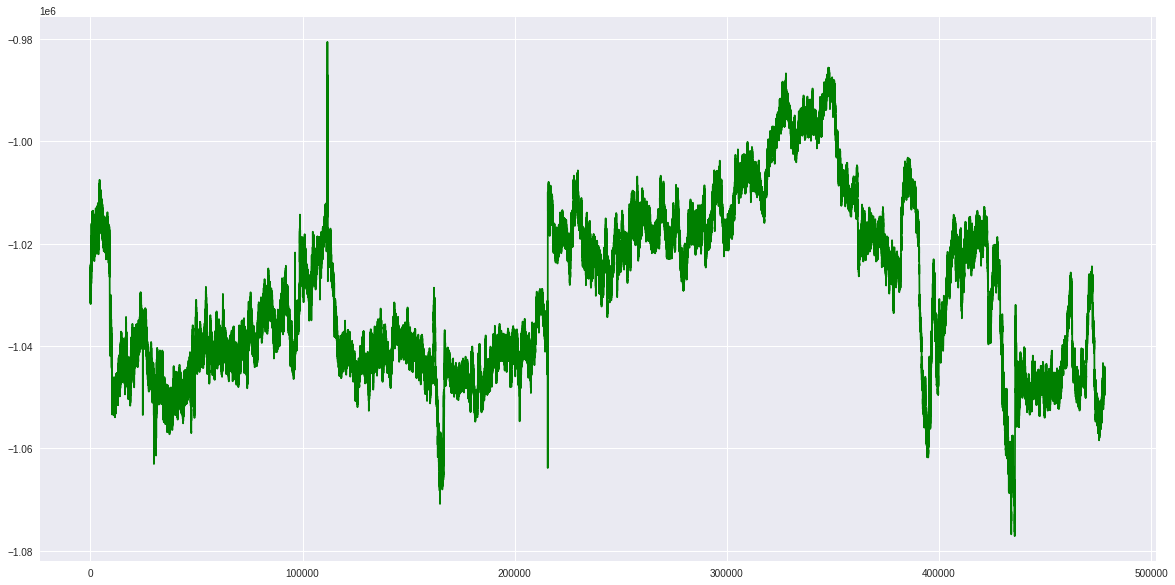

In [6]:
plt.style.use('seaborn')

ppg525 = ppg['580nm']
plt.figure(1, figsize=(20,10))
# colors for the line plot
colors = ['green', 'red', 'purple']

plt.plot(ppg525, "g-", label='PPG at 525nm')



###Moving average the signal


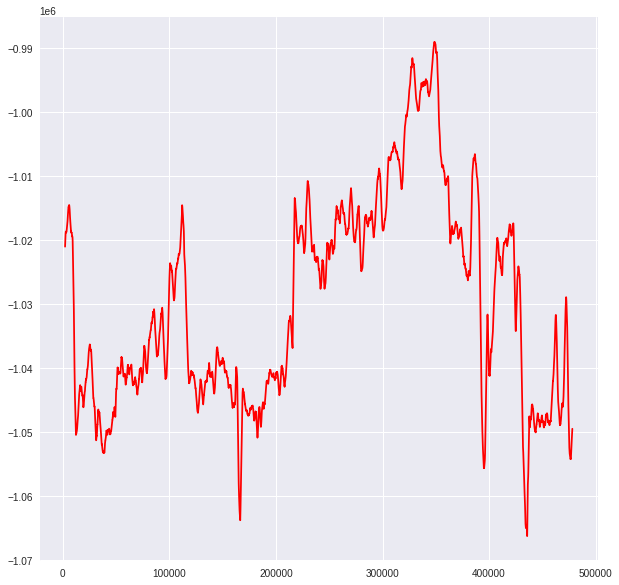

In [7]:
ppgMVA = ppg525.rolling(2000).mean()### windows = 2000 = (sample/second)*(1minutes)*5
plt.figure(1, figsize=(10,10))
plt.plot(ppgMVA, "r-", label='PPG at 525nm')


### Plot both raw and Moving average data

Text(0, 0.5, 'Amplitude')

<Figure size 720x720 with 0 Axes>

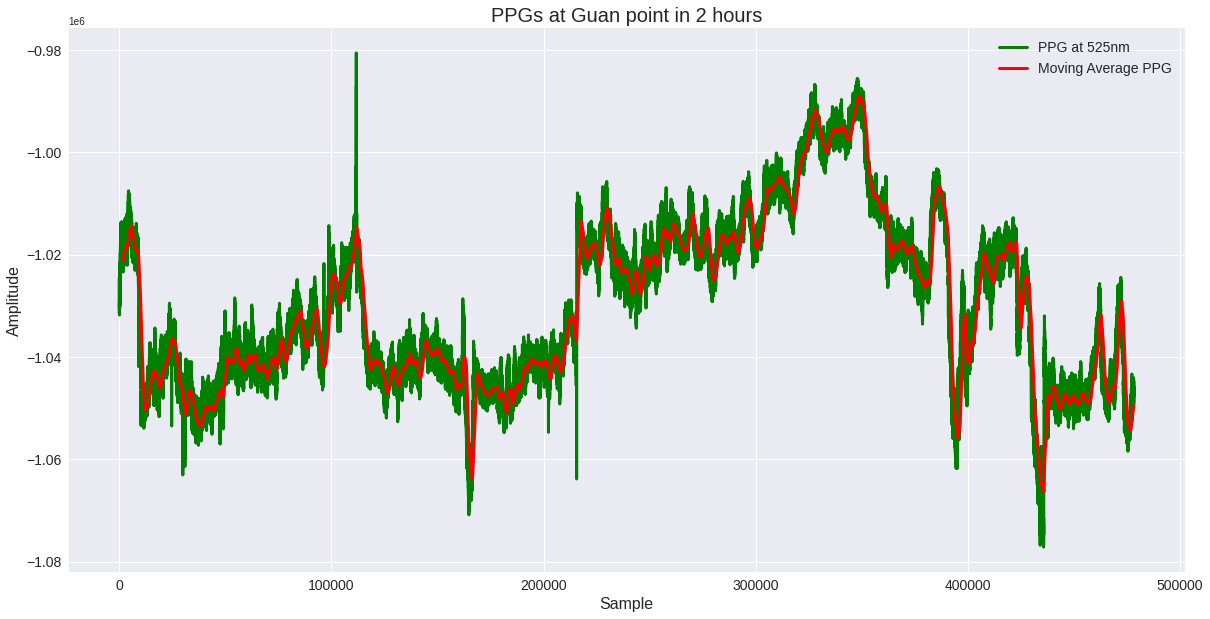

In [8]:
plt.style.use('seaborn')

ppg525 = ppg['580nm']
plt.figure(1, figsize=(10,10))
# colors for the line plot
colors = ['green', 'red', 'purple']

ppgMVA = ppg525.rolling(2000).mean()### windows = 2000 = (sample/second)*(1minutes)*5
### create a combine dataframe
df = pd.DataFrame(ppg525)
df['avg'] = ppgMVA
#plt.plot(ppg525, "g-", label='PPG at 525nm')
#plt.plot(ppgMVA, "r-", label='Moving Average of PPG at 525nm')
df.plot(color=colors, linewidth=3, figsize=(20,10))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['PPG at 525nm', 'Moving Average PPG' ], fontsize=14)

# title and labels
plt.title('PPGs at Guan point in 2 hours', fontsize=20)
plt.xlabel('Sample', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)


### Using Cummulating Moving Average

In [60]:
ppgCMA = ppg525.expanding().mean()
df['CMA'] = ppgCMA

Text(0, 0.5, 'Amplitude')

<Figure size 720x720 with 0 Axes>

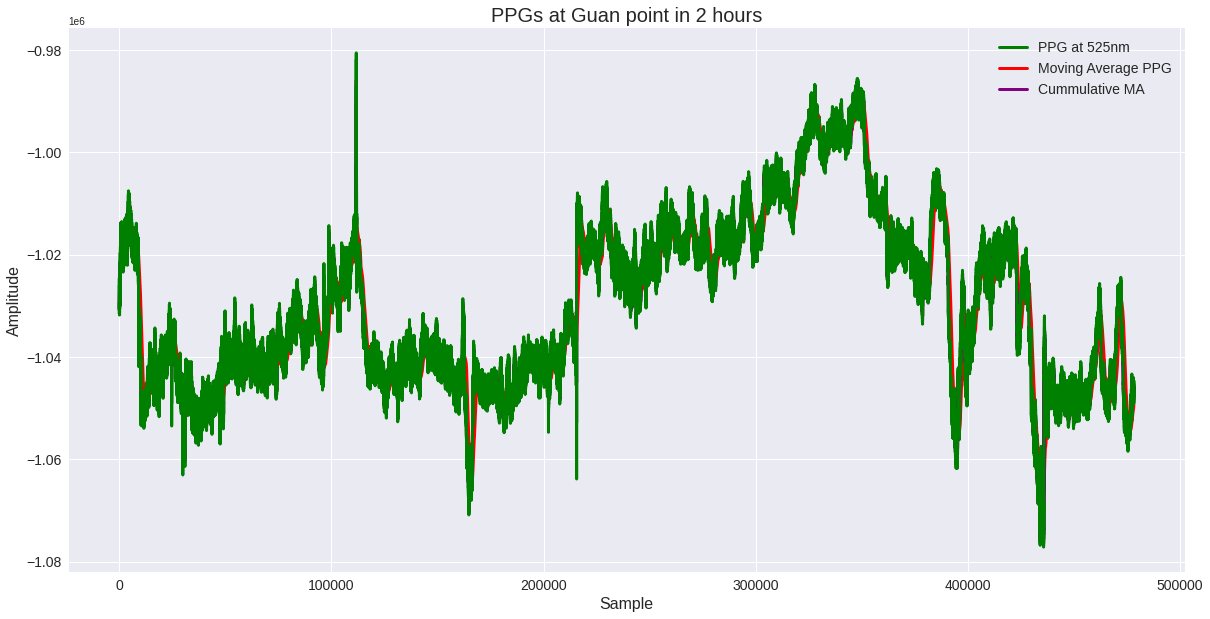

In [75]:
plt.figure(1, figsize=(10,10))
# colors for the line plot
colors = ['green', 'red', 'purple']

df.plot(color=colors, linewidth=3, figsize=(20,10))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['PPG at 525nm', 'Moving Average PPG', 'Cummulative MA' ], fontsize=14)

# title and labels
plt.title('PPGs at Guan point in 2 hours', fontsize=20)
plt.xlabel('Sample', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)

### Using Exponent moving averages

In [78]:
ppgEMA0 = df['avg'].ewm(alpha=0.1, adjust= False).mean()
ppgEMA1 = df['avg'].ewm(alpha=0.3, adjust= False).mean()
df['EMA_0.1'] = ppgEMA0
df['EMA_0.3'] = ppgEMA1

Text(0, 0.5, 'Amplitude')

<Figure size 720x720 with 0 Axes>

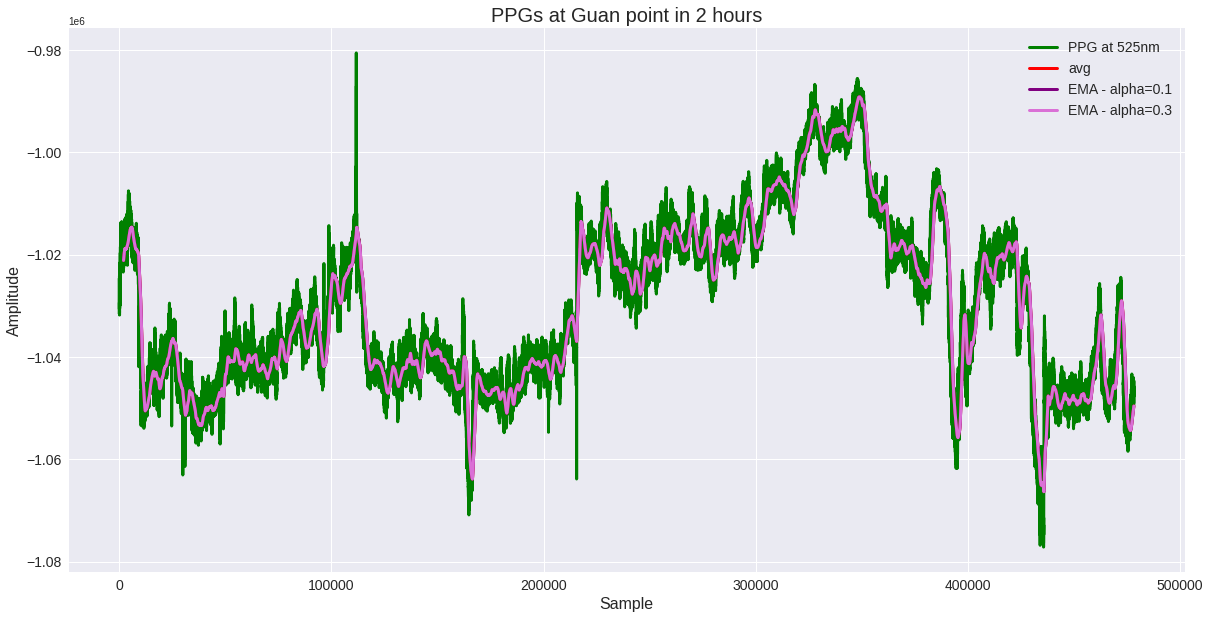

In [79]:
plt.figure(1, figsize=(10,10))
# colors for the line plot
colors = ['green', 'red', 'purple', 'orchid', 'orange']

df.plot(color=colors, linewidth=3, figsize=(20,10))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['PPG at 525nm', 'avg', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)

# title and labels
plt.title('PPGs at Guan point in 2 hours', fontsize=20)
plt.xlabel('Sample', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)

In [82]:
df.head()

,580nm,avg,EMA_0.1,EMA_0.3
0,-1030610.0,NaN,NaN,NaN
1,-1030310.0,NaN,NaN,NaN
2,-1030570.0,NaN,NaN,NaN
3,-1030260.0,NaN,NaN,NaN
4,-1030070.0,NaN,NaN,NaN


### Median Filter

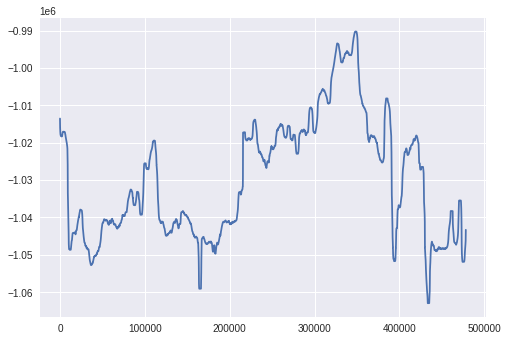

In [96]:
import scipy

data =np.reshape(df['580nm'], len(df['580nm']))
ppgfilt = scipy.signal.medfilt(data, kernel_size= 4901)

plt.plot(ppgfilt)

### Down sampling

In [127]:
def smooth(x,window_len=11, window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


In [100]:
step = 2100
a = np.arange(0,len(df['avg']), step)
dataDSP = df['avg'][a]
#remove nan
dataDSP = dataDSP[1:]


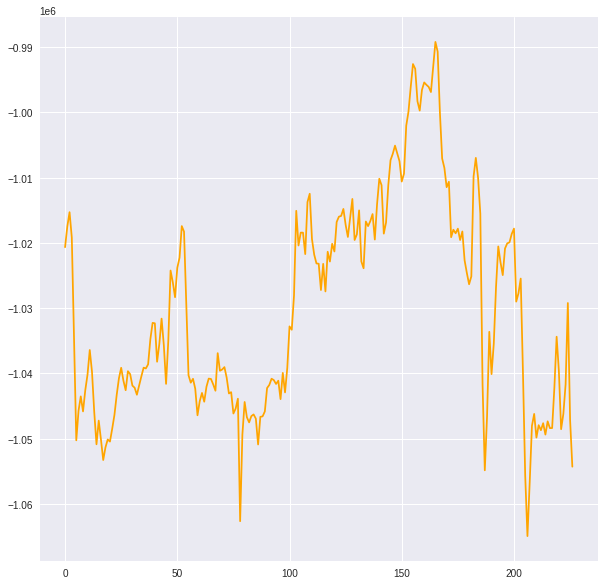

In [101]:
plt.figure(1, figsize=(10,10))
x = range(len(dataDSP))
plt.plot(x,dataDSP, "b-", label='PPG at 525nm', color='orange')

#plt.plot(dataDSP)

In [97]:
len(dataDSP)

227

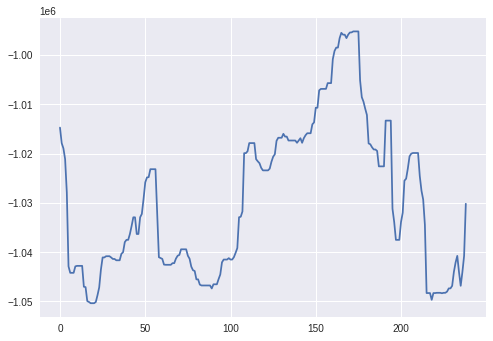

In [14]:
import scipy

data2 =np.reshape(dataDSP, len(dataDSP))
ppgfilt = scipy.signal.medfilt(data2, kernel_size= 7)

plt.plot(ppgfilt)

###Savitzky Golay

In [103]:
from scipy.signal import savgol_filter
yhat = [savgol_filter(dataDSP, 45, i, mode='wrap') for i in range(3,8,2)]# window size 51, polynomial order 3


###Import color

In [12]:
import seaborn as sns
colors = sns.color_palette("husl", 8)
colors = sns.color_palette("tab10")

In [79]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

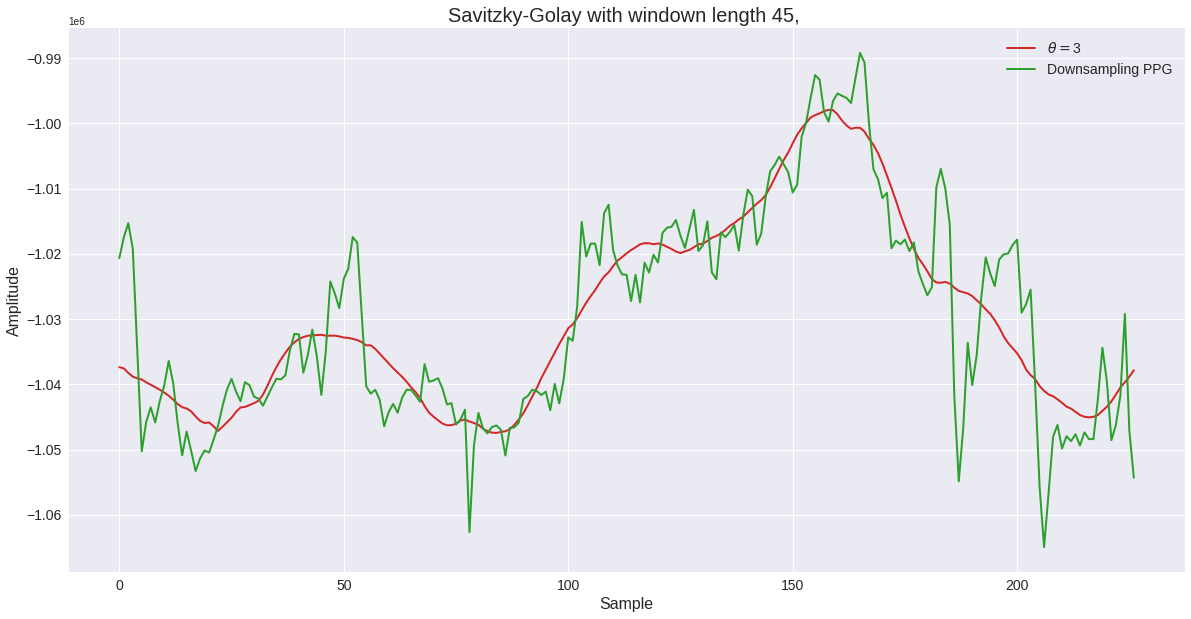

In [104]:
plt.figure(1, figsize=(20,10))
x = range(0, len(dataDSP))
df_yhat = pd.DataFrame(yhat)
df_yhat = df_yhat.T  ## transpose data to right dimention

position = 2
df_yhat.insert(position, 'Origin', dataDSP.values)
#plt.plot(dataDSP)
#plt.plot(x,df_yhat[0], "b-", label=r'$\theta= 3$')

df_yhat[0].plot(color=colors[3], linewidth=2, figsize=(20,10))
df_yhat['Origin'].plot(color=colors[2], linewidth=2, figsize=(20,10))
#plt.plot(yhat)
# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
labels = [r'$\theta=$'+ str(x) for x in range(3,8,2) ]
labels.insert(position,'Downsampling PPG')
plt.legend(labels =[labels[0],labels[2]], fontsize=14)

# title and labels
plt.title('Savitzky-Golay with windown length 45, ', fontsize=20)
plt.xlabel('Sample', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.show()

In [105]:
df_yhat.head()

,0,1,Origin,2
0,-1.037356e+06,-1.034900e+06,-1020661.110,-1.033452e+06
1,-1.037542e+06,-1.034752e+06,-1017493.375,-1.032567e+06
2,-1.038232e+06,-1.034305e+06,-1015295.405,-1.032619e+06
3,-1.038807e+06,-1.034259e+06,-1019177.775,-1.033049e+06
4,-1.039072e+06,-1.034897e+06,-1034750.250,-1.033507e+06


In [ ]:
df_yhat

##Reading Glucose Data


In [14]:
from pandas import read_csv
file_path = file_path = 'drive/My Drive/Dataset/GlucoseLong02_02April.csv'
dataset = read_csv(file_path,
                   
                   parse_dates=['Timestamp (YYYY-MM-DDThh:mm:ss)'],
                   index_col=['Timestamp (YYYY-MM-DDThh:mm:ss)'],
                   skiprows= [i for i in range(1,11)],
                   na_values= ['nan'])

In [15]:
dataset['Glucose Value (mg/dL)'][0]

126.0

### show data

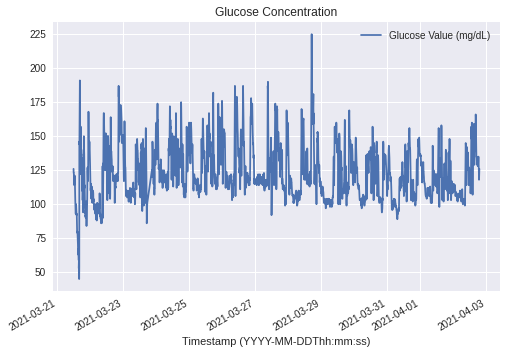

In [16]:
import matplotlib.pyplot as plt
dataset.plot(y='Glucose Value (mg/dL)', title='Glucose Concentration')
plt.show()

###Function to find index in time series

In [17]:
import numpy
def find_index(dataset, time):
   s = [index for index in range(len(dataset.index.values)) if dataset.index.values[index] == numpy.datetime64(time)]
   return s[0]

In [18]:
x_start = find_index(dataset, '2021-04-02T15:09:40')
x_stop = find_index(dataset, '2021-04-02T17:19:40')

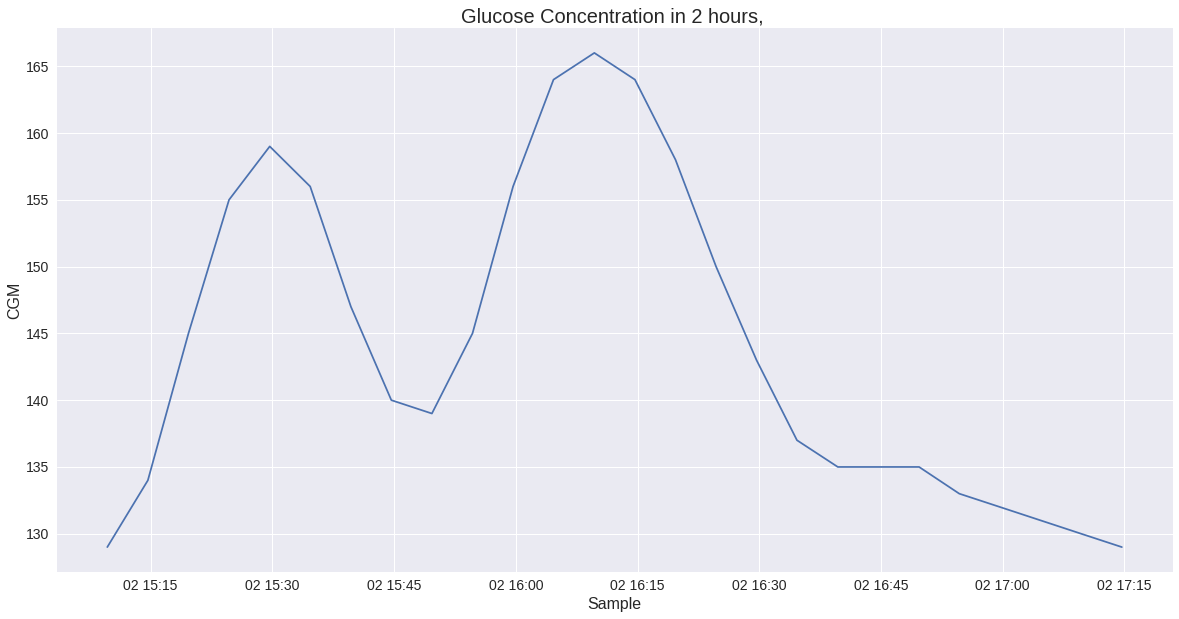

In [30]:
df_glu = dataset['Glucose Value (mg/dL)'][x_start:x_stop]
plt.figure(1, figsize=(20,10))
plt.plot(df_glu)
# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# title and labels
plt.title('Glucose Concentration in 2 hours, ', fontsize=20)
plt.xlabel('Sample', fontsize=16)
plt.ylabel('CGM', fontsize=16)
plt.show()

# Using tslearn package to find similarity

* install tslearn
* analyze similarity

In [31]:
!pip install tslearn

     |████████████████████████████████| 798kB 4.2MB/s 


In [32]:
from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn import metrics

### Findsimilarity

Text(0, 0.5, 'Scaled Amplitude')

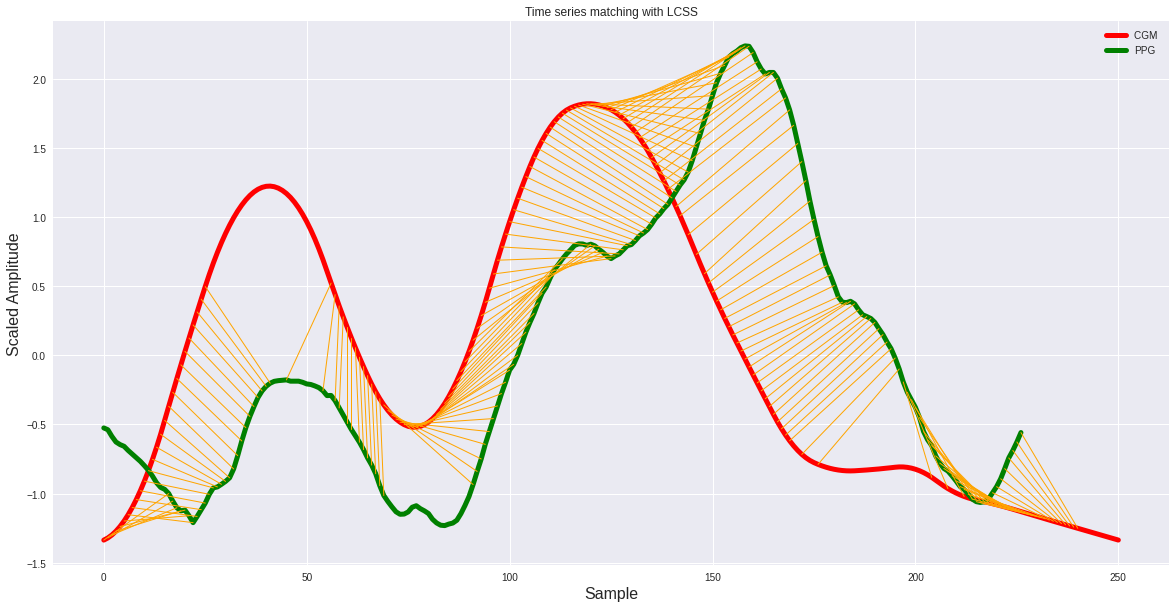

In [173]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) 
### Upsampling glucose data to 1 sps
upsampled = df_glu.resample('s')
itp_glu = upsampled.interpolate(method='polynomial', order=2)
### Downsampling to 1 sample per 30 seconds
step = 30
a = np.arange(0,len(itp_glu), step)
glu_DSP = itp_glu[a]

### rescaling data
s1 = scaler.fit_transform([glu_DSP])
s1 = s1.reshape(s1.size)
s2 = scaler.fit_transform([df_yhat[0]]) ### SG filter with theta = 3 
s2 = s2.reshape(s2.size)
#data = glu_DSP.values                            

lcss_path, sim_lcss = metrics.lcss_path(s1,s2, eps=0.7)                                      
dtw_path, sim_dtw = metrics.dtw_path(s2, s1)

plt.figure(1, figsize=(20,10))
plt.plot(s1, "r-", label='CGM ', linewidth = 5)
plt.plot(s2, "g-", label='PPG', linewidth = 5)

for positions in lcss_path:
    plt.plot([positions[0], positions[1]],
             [s1[positions[0]], s2[positions[1]]], color='orange', linewidth = 1)
plt.legend()
plt.title("Time series matching with LCSS")
plt.xlabel('Sample', fontsize=16)
plt.ylabel('Scaled Amplitude', fontsize=16)

In [106]:
### Upsampling glucose data
upsampled = df_glu.resample('s')
itp_glu = upsampled.interpolate(method='polynomial', order=2)

step = 30
a = np.arange(0,len(itp_glu), step)
glu_DSP = itp_glu[a]